## Introduction

## _Subscribing to a bank term deposit_

### Data Science project


- **1. Introduction**

- **2. Exploring the data**

- **3. Exploratory data analysis**

 - 3.1.  Describing the features
 - 3.2. Descriptive features
 
     - 3.2.1.Box plots
     - 3.2.2. Distribution plots
     - 3.2.3. Correlation matrix
     - 3.2.4. Outlier Detection
     
 - 3.3. Feature Engineering
     - 3.3.1. Feature transformation 
     - 3.3.2. Dropping highly correlated feature
     - 3.3.3. Creating a new feature
     - 3.3.4. Replacing outplut variable with new data
     - 3.3.5. Creating dummy variables
     
- **4. Model Selection**

 - 4.1. Data preparation
 - 4.2. Creating summary metrics
 - 4.3.Fitting the baseline model
 
     - 4.3.1. Checking the model performance
     - 4.3.2. Creating a confusion matrix
     
 - 4.4.Fit the model with improvised data
 
     - 4.4.1. Using sampling techniques to balance the imbalanced classes
     
     - 4.4.2.  Applying Recursive Feature Elimination(RFE) with cross-fold evaluation
     
- **5. Describing important features**

- **6. Results**

- **7. Actionable Recommendations**
     
 
 


## 1. Introduction

This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at https://www.bportugal.pt/estatisticasweb.
   
The bank runs a marketing campaign to bring customers on board with the term deposits.

The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

Number of Instances: 41188 for bank-additional-full.csv

Number of Attributes: 20 + output attribute.
 

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import mean
from numpy import std
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## 2. Exploring the Data

In [2]:
#Loading the data
bank_data=pd.read_csv('bank-additional-full.csv',sep=';')
    
#Let's have a look at our dataset to observe the summary stats for each variable, number of missing data, etc.
print('Number of nulls in the data',bank_data.isnull().any())

Number of nulls in the data age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool


In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#Observing the stats
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### From the above description following things can be observed

1.Max and min age of the person in this population is 98 and 17 resp. and the mean lies around 40. So age feature might have extreme values on the left.

2.Min. value of duration is 0(not contacted) and max value is 4918 indicating duration has extreme values having heavy left tails.

3.Campaign might have extreme values on the left as the median is less than the mean indicating left skewed data.

4.Euribo3 and nr.employed indicate right skweness.

In [5]:
modified_bank_data=bank_data.copy()

In [6]:
#Checking if the data has duplicate values
def duplicate_rows(df):
    print('Number of duplicate records=',df.duplicated().sum())

In [7]:
duplicate_rows(modified_bank_data)

Number of duplicate records= 12


In [8]:
#Dropping the duplicate values
def drop_duplicates(df):
    df=df.drop_duplicates()

In [9]:
drop_duplicates(modified_bank_data)

## 3. Exploratory Data Analysis(EDA)

## 3.1 Describing the features

In [10]:
#Observing the class instances
classes=modified_bank_data.y.value_counts()/len(modified_bank_data)
classes

no     0.887346
yes    0.112654
Name: y, dtype: float64

This is a heavily imbalanced data so we would have to work on making the classes balanced so that the model does not bias towards only predicting 0's/no's.

In [11]:
#Checking the characteristics of the two classes 0 and 1.
modified_bank_data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


1. We can observe that the customers who purchased the term deposit at the Portugese bank were higher in age than those who did not purchase the term deposit.

2. Also we can observe that pdays(days since the last contact of previous campaign) and campaign(calls for this campaign) was lower for the clients who purchased the term deposit which makes sense.

In [12]:
#Observing the stats of the categorical features.
modified_bank_data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


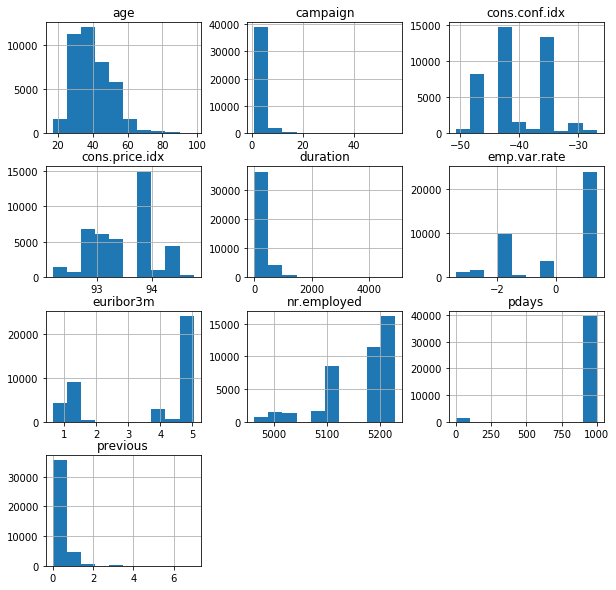

In [13]:
#Observing the distribution
modified_bank_data.hist(figsize=(10,10))
plt.show()

In [14]:
#Checking the extreme values of age feature
modified_bank_data[modified_bank_data['age']<18].sort_values(by=['age'])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes


It doesn't make any sense for students under 18 years to open a bank term deposit or even get a housing or a personal loan. So removing these values.

In [15]:
modified_bank_data=modified_bank_data[modified_bank_data['age']>18]

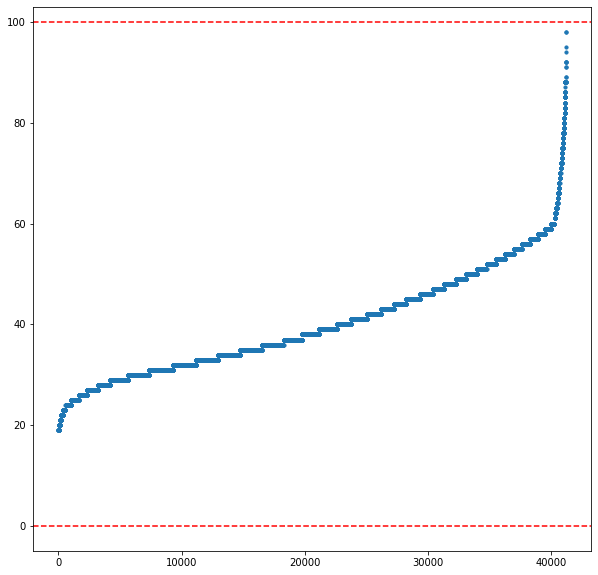

In [16]:
# Plotting sorted age against their index
sorted_age = sorted(modified_bank_data['age'])
idx = []
for i in range(len(sorted_age)):
    idx.append(i)
x = idx
y = sorted_age


plt.figure(figsize=(10,10))
plt.scatter(x, y, s=10)
plt.axhline(y=0, linestyle='--', color='r')
plt.axhline(y=100, linestyle='--', color='r')

## 3.2 Descriptive Figures

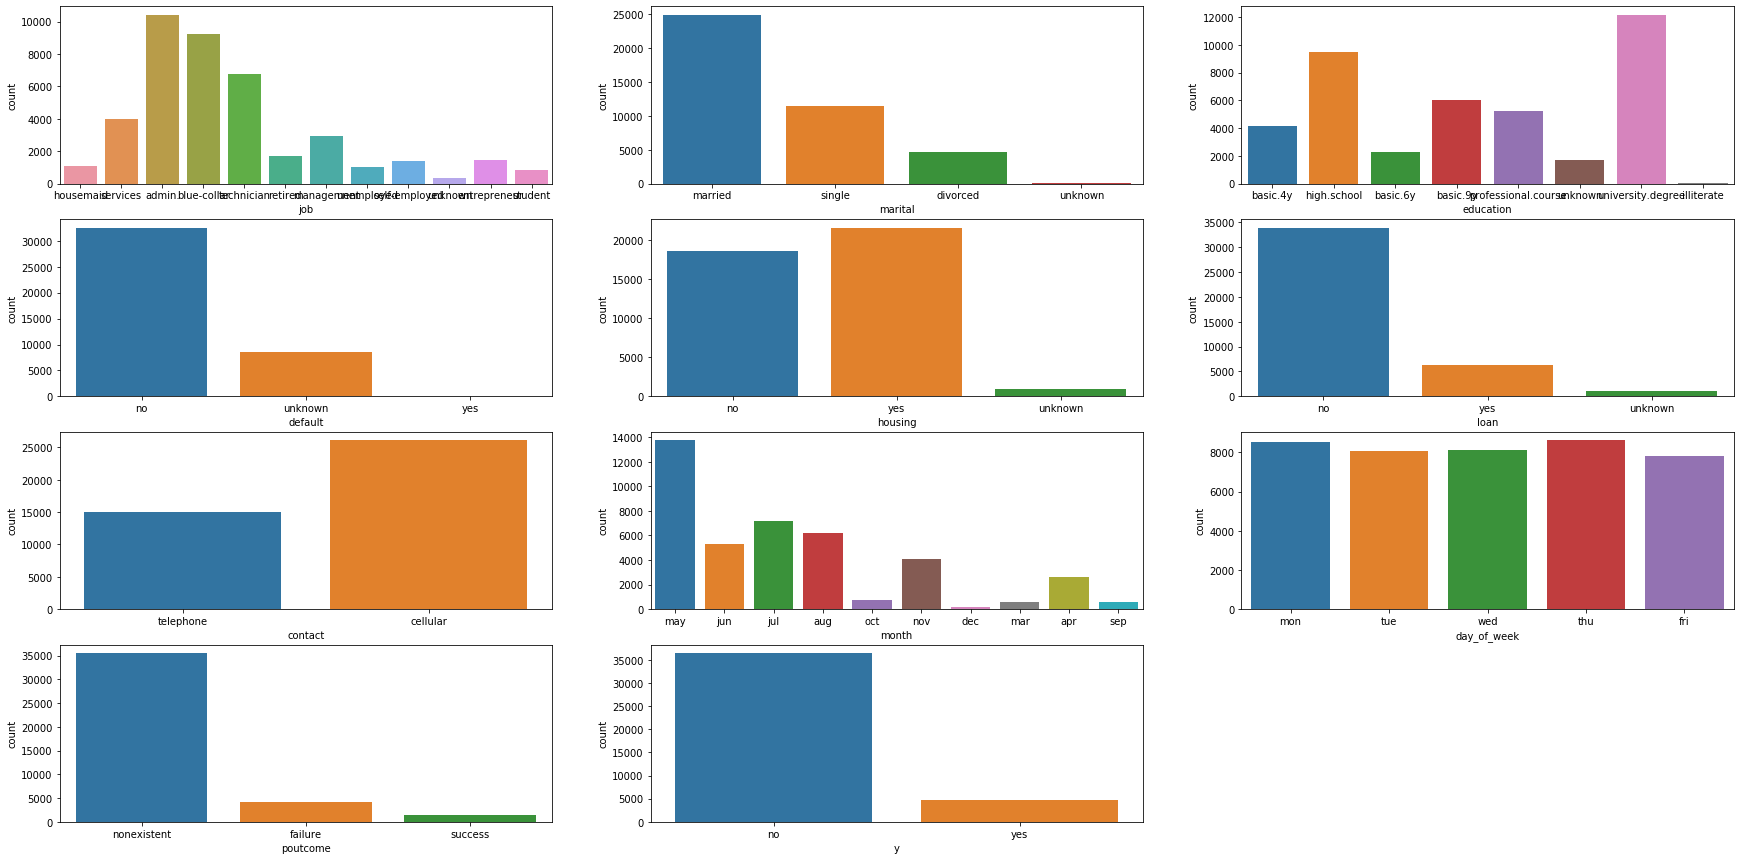

In [17]:
#Observing categorical plots.
def subplots(size,cols,data):
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(4,3,i+1)
        sns.countplot(x=data[features[i]])
        

features= modified_bank_data.select_dtypes(exclude=['int64','float64']).columns
    
subplots((30,15),features,modified_bank_data)

From the above figures it is observed that, there are higher instances of the following features:
- admin job-type,
- Married marital status
- People having university degree
- People with no default
- People who have been contacted via cellular network
- And, the classes no and yes are highly imbalanced with majority no values and very few positive cases.

## 3.2.1. Box Plots

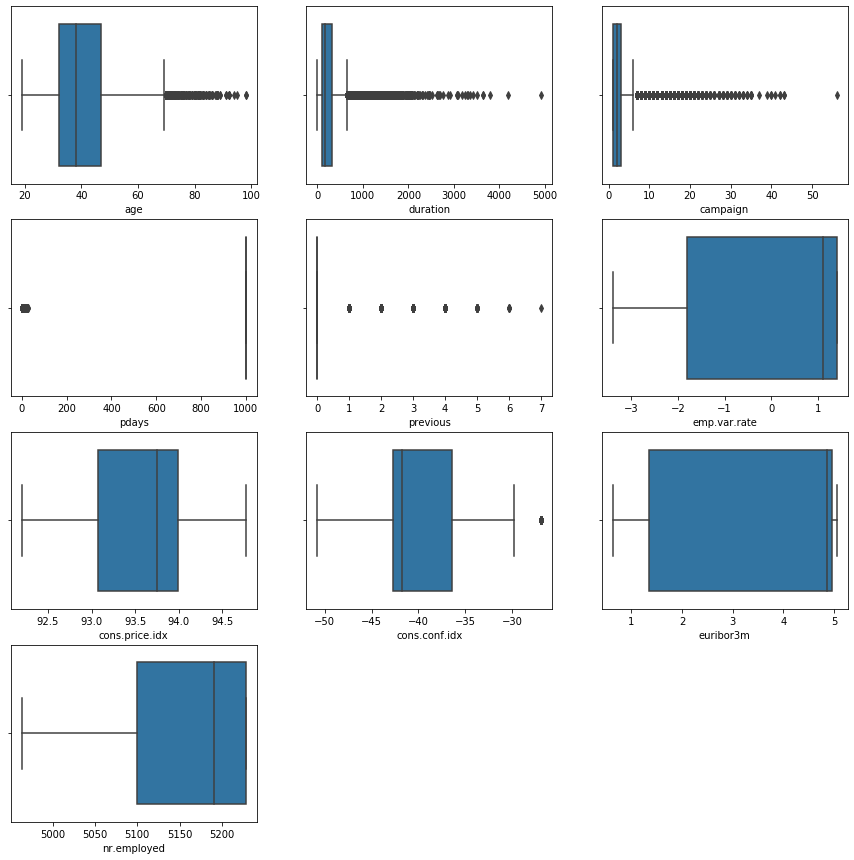

In [18]:
#Observing the distribution and extreme values in numerical features
def box_plots(size,cols,data):
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(4,3,i+1)
        sns.boxplot(x=data[features[i]])
        
features=modified_bank_data.select_dtypes(exclude=['object']).columns

box_plots((15,15),features,modified_bank_data)
    

From the above we can see that campaign has an extreme value which can bias our model, same goes for pdays and cons.conf.idx

## 3.2.2. Distribution plots

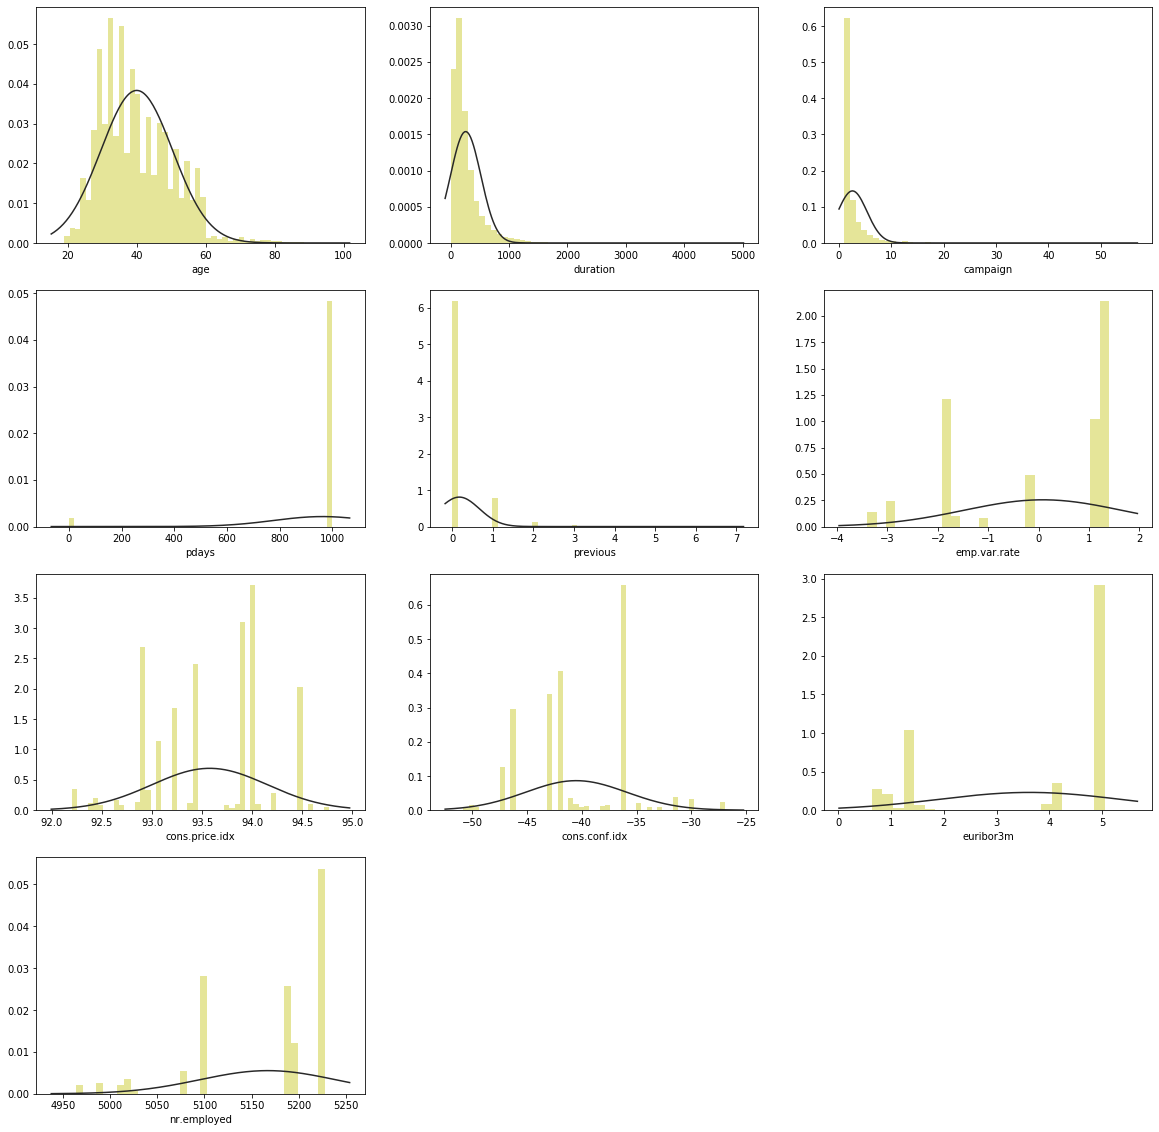

In [19]:
#Observing the distribution and extreme values in numerical features
def dist_plots(size,cols,data):
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(4,3,i+1)
        sns.distplot(data[features[i]],fit=norm,kde=False,color='y')
        
features=modified_bank_data.select_dtypes(exclude=['object']).columns

dist_plots((20,20),features,modified_bank_data)

From the above we can see that age,campaign,previous are left skewed which might bias our model so we will apply log transformation to these features. And duration is said to have direct influence with the y variable so we will drop it in later stage.

## 3.2.3. Correlation matrix

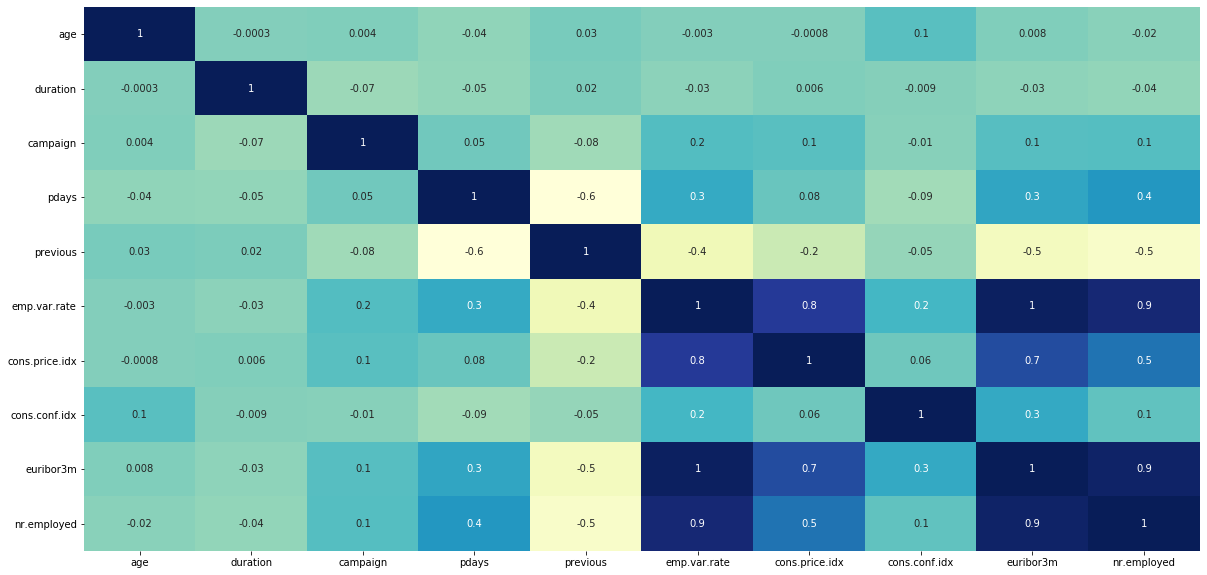

In [20]:
#Correlation matrix

def correlation_matrix(data):
    corr=data.corr()
    plt.figure(figsize=(20,10))
    sns.heatmap(corr,annot=True,fmt='.1g',xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap="YlGnBu",cbar=False)
    
correlation_matrix(modified_bank_data)
    

## 3.2.4. Outlier Detection

In [21]:
#As the data is skewed so we will use IQR to identify outliers
cols=modified_bank_data.select_dtypes(exclude=['object']).columns

def outlier_IQR(df,column):

    stat = df[column].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers of',each, 'are {} and {}.'.format(upper, lower))

In [22]:
modified_bank_data.loc[modified_bank_data['campaign']>10,'campaign'].value_counts()[-6:]

40    2
42    2
37    1
39    1
41    1
56    1
Name: campaign, dtype: int64

Observing the above data, lot of data lies after 75th percentile so it would make no sense to those values, it is significant from the box plot above as well.So we will just remove the extreme value 56.

In [23]:
#Dropping the extreme value row.
modified_bank_data=modified_bank_data[modified_bank_data['campaign']<56]

## 3.3.Feature Engineering

Before fitting our model it is important to give correct shape to our features prior to splitting the dataset.

## 3.3.1 Feature transformation

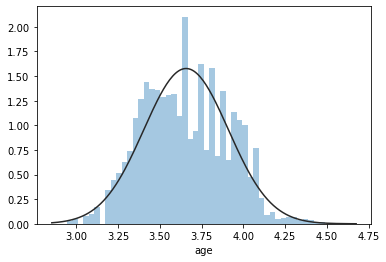

In [24]:
#Firstly, we log transform the skewed feature age

modified_bank_data['age']=np.log(modified_bank_data['age'])
sns.distplot(modified_bank_data['age'],fit=norm,kde=False)


**The boxcox() SciPy function implements the Box-Cox method. It takes an argument, called lambda, that controls the type of transform to perform.**

Below are some common values for lambda:

1.lambda = -1. is a reciprocal transform.

2.lambda = -0.5 is a reciprocal square root transform.


3.lambda = 0.0 is a log transform.


4.lambda = 0.5 is a square root transform.


5.lambda = 1.0 is no transform.



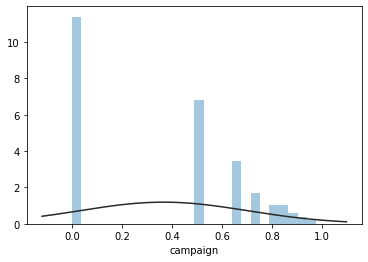

In [25]:
#Reciprocal transform campaign
modified_bank_data['campaign']=boxcox(modified_bank_data['campaign'],-1)
sns.distplot(modified_bank_data['campaign'],fit=norm,kde=False)

## 3.3.2. Dropping highly correlated feature

In [26]:
#Dropping the original duration  feature, duration because it is said to influence our model.
modified_bank_data.drop(['duration'],inplace=True,axis=1)

## 3.3.3. Creating a new feature

In [27]:
#Checking if there are any instances where the customer was not contacted previously and no calls were made to the
#customer before this campaign.

modified_bank_data[(modified_bank_data['previous']==0) & (modified_bank_data['pdays']==999)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4.025352,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4.043051,services,married,high.school,unknown,no,no,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3.610918,services,married,high.school,no,yes,no,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3.688879,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4.025352,services,married,high.school,no,no,yes,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,3.610918,admin.,married,university.degree,no,yes,no,cellular,nov,fri,0.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,4.290459,retired,married,professional.course,no,yes,no,cellular,nov,fri,0.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,3.828641,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,0.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,4.025352,retired,married,university.degree,no,yes,no,cellular,nov,fri,0.5,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [28]:
#Creating customer contacted or not contacted column
def customer_contacted(modified_bank_data):
    if modified_bank_data['previous']==0 and modified_bank_data['pdays']==999:
        return 'No Contact'
    else:
        return 'Contacted'
    
modified_bank_data['Contact_before_this_campaign']= modified_bank_data.apply(customer_contacted, axis=1)

modified_bank_data.Contact_before_this_campaign.value_counts()
    

No Contact    35547
Contacted      5607
Name: Contact_before_this_campaign, dtype: int64

In [29]:
#26.5% of contacted people bought the term deposit

print('Percentage of contacted people who bought the term dep.=',len(modified_bank_data[(modified_bank_data['Contact_before_this_campaign']=='Contacted') & (modified_bank_data['y']=='yes')])/len(modified_bank_data[modified_bank_data['Contact_before_this_campaign']=='Contacted'])*100)

# 73.4% of the contacted people did not buy the term deposit

print('Percentage of contacted people who did not purchase the term dep.=',len(modified_bank_data[(modified_bank_data['Contact_before_this_campaign']=='Contacted') & (modified_bank_data['y']=='no')])/len(modified_bank_data[modified_bank_data['Contact_before_this_campaign']=='Contacted'])*100)

#8.83% of the non-contacted people had purchased the term deposit

print('Percent of not contacted people who bougth the term dep.=',len(modified_bank_data[(modified_bank_data['Contact_before_this_campaign']=='No Contact') & (modified_bank_data['y']=='yes')])/len(modified_bank_data[modified_bank_data['Contact_before_this_campaign']=='No Contact'])*100)

#91.17% of the not contacted people did not buy the term deposit, so the bank may have to increase their contacted calls 
#Or the bank knew that these category of the people would not buy the term deposit.

print('Percent of not contacted people who bougth the term dep.=',len(modified_bank_data[(modified_bank_data['Contact_before_this_campaign']=='No Contact') & (modified_bank_data['y']=='no')])/len(modified_bank_data[modified_bank_data['Contact_before_this_campaign']=='No Contact'])*100)

Percentage of contacted people who bought the term dep.= 26.55609060103442
Percentage of contacted people who did not purchase the term dep.= 73.44390939896557
Percent of not contacted people who bougth the term dep.= 8.824936000225055
Percent of not contacted people who bougth the term dep.= 91.17506399977493


In [30]:
#Observing what percentage of people who have an existing loan or default purchased the term deposit.

print('Percent of people who have an existing money to pay and have not purchased the term deposit=',len(modified_bank_data[((modified_bank_data['default']=='yes')|(modified_bank_data['housing']=='yes')|(modified_bank_data['loan']=='yes'))&(modified_bank_data['y']=='no')])/(len(modified_bank_data))*100)

Percent of people who have an existing money to pay and have not purchased the term deposit= 51.8540117607037


## 3.3.4. Replacing output variable with numeric data

In [31]:
#Replacing the yes and no with 1 and 0
modified_bank_data['y'].replace(['yes','no'],[1,0],inplace=True)

## 3.3.5. Creating Dummy variables

In [32]:
### One hot encoding the features.
modified_bank_data=pd.concat([pd.get_dummies(data=modified_bank_data,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','Contact_before_this_campaign'])
],axis=1)

## 4. Model Selection

## 4.1 Data preparation 

Firstly we will see the accuarcy of the benchmark model i.e using the data which is untouched and includes all the variables.

In [33]:
from sklearn.model_selection import train_test_split as sklearn_train_test_split

def split(df):
    
    X= df[[i for i in list(df.columns) if i!='y']].values
    y=df['y']
    
    X_train,X_test,y_train,y_test=sklearn_train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)
    
    #Scaling the splitted data
    scaler=StandardScaler()
    scaler.fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    return X_train,X_test,y_train,y_test


In [34]:
X_train,X_test,y_train,y_test=split(modified_bank_data)

## 4.2. Creating summary metrics

In [35]:
#Summary metrics

def summary_metrics(y_test,y_pred):
    conf_matrix= confusion_matrix(y_test, y_pred)
    
    print('confusion matrix',conf_matrix)
    
    
    print('Accuracy',accuracy_score(y_test,y_pred))
    print('Precision',precision_score(y_test,y_pred))
    print('Recall',recall_score(y_test,y_pred))
    

## 4.3. Fitting the baseline models

In [36]:
#Observing the benchmark models

y_preds=[]
classification_reports=[]


#Creating instances for three different models
logistic_model=LogisticRegression(max_iter=7600)
Decisiontree_model=DecisionTreeClassifier()
RF_model=RandomForestClassifier()

list_models=[logistic_model,Decisiontree_model,RF_model]


    #Fitting the models
for each in list_models:
    initial_models=each.fit(X_train,y_train)
    y_pred=initial_models.predict(X_test)
    y_preds.append(y_pred)
    classification_reports.append(classification_report(y_test,y_pred))
    summary_metrics(y_test,y_pred)


confusion matrix [[9007  125]
 [ 911  246]]
Accuracy 0.8993099426572068
Precision 0.6630727762803235
Recall 0.212618841832325
confusion matrix [[8266  866]
 [ 766  391]]
Accuracy 0.8413840023325883
Precision 0.31105807478122516
Recall 0.337942955920484
confusion matrix [[8865  267]
 [ 829  328]]
Accuracy 0.8934784721547283
Precision 0.5512605042016807
Recall 0.28349178910976663


It can be observed that the lowest recall is obtained in Logistic Regression(21.26%)

### 4.2.1. Checking the model performance

In [37]:
#Observing the performance of all the three models.
for each in classification_reports:
    print(each)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9132
           1       0.66      0.21      0.32      1157

    accuracy                           0.90     10289
   macro avg       0.79      0.60      0.63     10289
weighted avg       0.88      0.90      0.88     10289

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      9132
           1       0.31      0.34      0.32      1157

    accuracy                           0.84     10289
   macro avg       0.61      0.62      0.62     10289
weighted avg       0.85      0.84      0.84     10289

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9132
           1       0.55      0.28      0.37      1157

    accuracy                           0.89     10289
   macro avg       0.73      0.63      0.66     10289
weighted avg       0.87      0.89      0.88     10289



# 4.4.  Fit the model with our improvised data.

## 4.4.1.Using sampling techniques to balance the imbalanced classes 

In [38]:
# Using SMOTE AND TOMEK Over sampling and undersampling techniques

Xdash= modified_bank_data[[i for i in list(modified_bank_data.columns) if i!='y']]
columns=Xdash.columns

from imblearn.combine import SMOTETomek

smt=SMOTETomek(sampling_strategy= 'auto')
X_smt,y_smt=smt.fit_sample(X_train,y_train)
X_smt_df=pd.DataFrame(data=X_smt,columns=columns)
y_smt_df=pd.DataFrame(data=y_smt,columns=['y'])


In [39]:
print('Number of NO subscription in oversampled data',len(y_smt_df[y_smt_df['y']==0]))
print('Number of YES subscription in oversampled data',len(y_smt_df[y_smt_df['y']==1]))

Number of NO subscription in oversampled data 27198
Number of YES subscription in oversampled data 27198


## 4.4.2. Applying Recursive Feature Elimination(RFE) with cross-fold evaluation

In [40]:
# Applying RFE for feature selection and applying on three different models.
#Also capturing their classification scores.


def elimination_crossval(model):
    
    #Initiating the RFE instance
    rfe=RFE(estimator=RandomForestClassifier(),n_features_to_select=10)
    
    #Fitting the rfe
    X_rfe=rfe.fit_transform(X_smt,y_smt)
    
    #Transforming X_test
    X_rfe_test=rfe.transform(X_test)
    
    model=model
    
    #Creating pipeling to avoid data leakage
    pipeline=Pipeline(steps=[('s',rfe),('m',model)])
    
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    
    scores =cross_val_score(pipeline,X_rfe, y_smt, scoring='accuracy', cv=cv, n_jobs=-1)
    
    print('Accuracy for model with cross val: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))
    
    #Fitting the pipeline
    fitted_model=pipeline.fit(X_rfe,y_smt)
    
    y_preds=fitted_model.predict(X_rfe_test)
    
    #Printing the classification report
    print(classification_report(y_test,y_preds))
    
    summary_metrics(y_test,y_preds)

In [41]:
#Logistic Model
elimination_crossval(LogisticRegression(max_iter=7600))

Accuracy for model with cross val: 71.861 (0.465)
              precision    recall  f1-score   support

           0       0.95      0.74      0.84      9132
           1       0.26      0.71      0.38      1157

    accuracy                           0.74     10289
   macro avg       0.61      0.73      0.61     10289
weighted avg       0.88      0.74      0.79     10289

confusion matrix [[6800 2332]
 [ 330  827]]
Accuracy 0.7412770920400428
Precision 0.26179170623615067
Recall 0.7147796024200519


In [42]:
#Decision tree 
elimination_crossval(DecisionTreeClassifier())

Accuracy for model with cross val: 90.279 (0.400)
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      9132
           1       0.33      0.30      0.31      1157

    accuracy                           0.85     10289
   macro avg       0.62      0.61      0.62     10289
weighted avg       0.85      0.85      0.85     10289

confusion matrix [[8407  725]
 [ 807  350]]
Accuracy 0.8511031198367188
Precision 0.32558139534883723
Recall 0.3025064822817632


In [43]:
#Random forest
elimination_crossval(RandomForestClassifier())

Accuracy for model with cross val: 91.516 (0.250)
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      9132
           1       0.39      0.34      0.36      1157

    accuracy                           0.87     10289
   macro avg       0.65      0.64      0.64     10289
weighted avg       0.86      0.87      0.86     10289

confusion matrix [[8520  612]
 [ 764  393]]
Accuracy 0.8662649431431626
Precision 0.39104477611940297
Recall 0.33967156439066554


From all the three classification models above it can be observed that the highest recall is observed in logistic regression model and lowest in Decision tree classifier.

# 5. Descibing important features

In [44]:
def important_features(estimator,n_features_to_select):
    
    rfe=RFE(estimator=estimator, n_features_to_select=n_features_to_select)
    X_rfe=rfe.fit_transform(X_smt,y_smt)


    columns = X_smt_df.columns
    val = pd.Series(rfe.support_,index = columns)
    features_chosen_rfe = val[val==True].index 
    print(features_chosen_rfe)

In [45]:
important_features(RandomForestClassifier(),4)

Index(['age', 'campaign', 'euribor3m', 'nr.employed'], dtype='object')


In [46]:
modified_bank_data.to_csv('BANK_DATA',index=False)

# 6. Results


 1.For our business problem, we wanted to predict the term subscription based on a campaign so it is vital to have a high recall to have higher revenue. For that, it is important to choose a model with better recall and less false negatives, hence we choose the Logistic Model to better classify the customer term deposit prediction.
 
2.The improvised logistic model results in 70.29% better recall than the baseline logistic model.


3.All the model's classification report that we have got still indicate the maximum classification of the majority class(0). This tells us that there is more scope for model optimization or the use of different classification unsupervised learning models.


4.For every false positive the bank will be spending money and investing in other revenue-generating sources. On the other hand, the bank will lose its customer trust and the possibility of losing the customer when the resources would also have been utilized.


5.For every false negative the bank has the possibility of losing out a potential customer.


6.For the marketing campaign, its very important for the bank to get in more customers to subscribe for the term deposit so that the bank can get more revenue, if in this case, the bank starts to lose out on customers in other words the bank would not want customer churn as a result of the output of the marketing campaign. So, it's important to have less False Negatives.

# 7.Actionable Recommendations

##### Observing the results and the exploratory data analysis, the most important features which the bank should focus on to attract more customers to buy term deposit are:

1. Duration
2. age
3. campaign
4. Euribo3
5. nr.employed


1.Duration being one of the most influential factors,i.e. the higher the call duration the higher the chances of a sale. So the bank should focus on enhancing the quality of calls by building a rapport with the customers, decreasing wait time, checking in with the customers, and most importantly take feedback from the customers.


2.Age feature demonstrates that the majority term deposit purchasing capacity lies within the age group of 25-58 yrs adults. So, the bank should target this age group more and allocate more resources in getting in the customers from this particular age group.


3.Campaign feature is important as it indicates the number of calls made during the current campaign. The customers do not like to get bothered with too many calls so a sweet spot lies within 1-5 calls, again depending upon the interest of the customer. So the bank should focus on training the sales team so that they can know the interested and non-interested customers based on the behavior,voice modulations, tone, and pitch of the customer.


4.Euribo3 is indicative of the trend that the higher interest rates attract more customers. So there are two things which the bank can pursue which are as follows:
   -Target the age group which is liable to get higher interest rates (4.5-5) particularly.
   -Increase the marketing campaign when the interest rates are higher, which can help in bringing more clients on board with the term deposits.
   
   
5.nr.employed trend indicates that more number of employees leads to more number of customers, which makes sense because if there are more employees, more leads can be targeted, proper followups and check-ins can be done. On the other hand, customer satisfaction could be achieved by creating a dedicated after-sales team. So, the bank should focus on hiring more people.

